In [1]:
import json
import h5py
import numpy as np
import requests
import json
from matplotlib import pyplot as plt

# Load the prosepectivate sample

In [2]:
data_to_predict = '/home/wentao/UNet-MRI-Reconstruction/data/prospectiveSample.mat'

In [3]:
f = h5py.File(data_to_predict, 'r')

In [4]:
input_data = np.array(f.get('imagesRecon'))

In [5]:
input_data.shape

(10, 128, 128, 20)

# Convert the data into json format and send an API request

In [6]:
model = 'UNet2D2D'

In [7]:
API = "http://localhost:8501/v1/models/{model}:predict".format(model=model)

In [8]:
data = json.dumps({"instances": input_data.tolist()})

In [9]:
response = requests.post(API, data=data)

In [10]:
response

<Response [200]>

In [11]:
print("The time taken for each image is {}s".format(response.elapsed.total_seconds()/input_data.shape[0]))

The time taken for each image is 0.41784s


In [12]:
prediction = np.array(response.json()['predictions'])

In [13]:
prediction.shape

(10, 128, 128, 20)

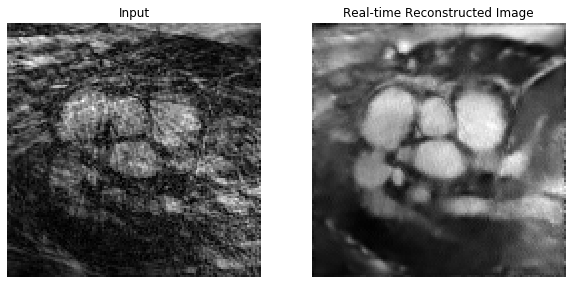

In [14]:
plt.figure(1, figsize=(10,10))

plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Input')
plt.imshow(input_data[0, :, :, 0], cmap='gray')

plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('Real-time Reconstructed Image')
plt.imshow(prediction[0, :, :, 0], cmap='gray')


plt.savefig('./images/docker_prediction_{model}.jpg'.format(model=model))